In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading and Preprocessing

Load the California Housing dataset using the fetch_california_housing function
from sklearn.

In [2]:
housing_data = fetch_california_housing(as_frame=True)

Convert the dataset into a pandas DataFrame for easier handling.

In [3]:
df = housing_data.frame

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [6]:
df.shape

(20640, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


Handle missing values (if any)

In [10]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

##### Initial Observations:

The dataset has 20640 rows and 9 columns.
No missing values in any columns.
No duplicated rows.

The target variable is "MedHouseVal".
All features are numerical encoded as floating number.

##### Features:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

### Visualizing the features

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

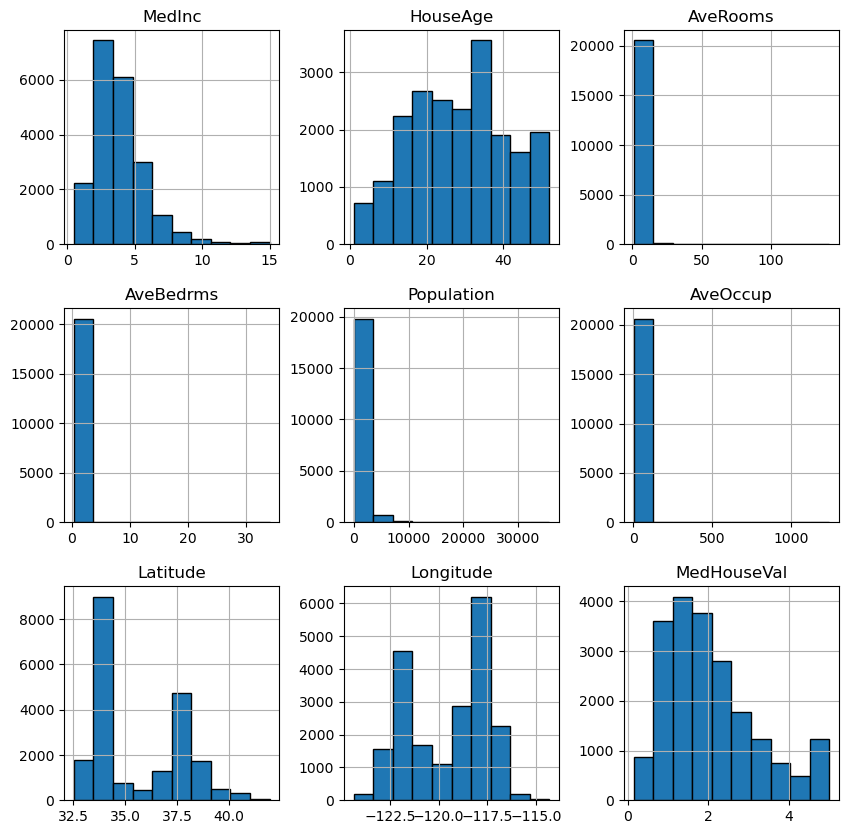

In [11]:
df.hist(figsize = (10, 10), edgecolor="black")

##### Observation:
The median income has a long time.
For the house age distribution is more or less uniform.
Average rooms, average bedrooms, average occupation, and population have high and low values.

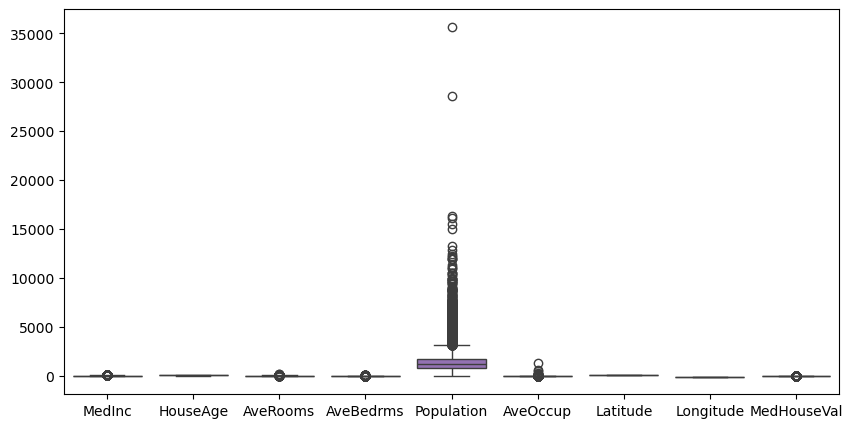

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(df)
plt.show()

<Axes: ylabel='MedInc'>

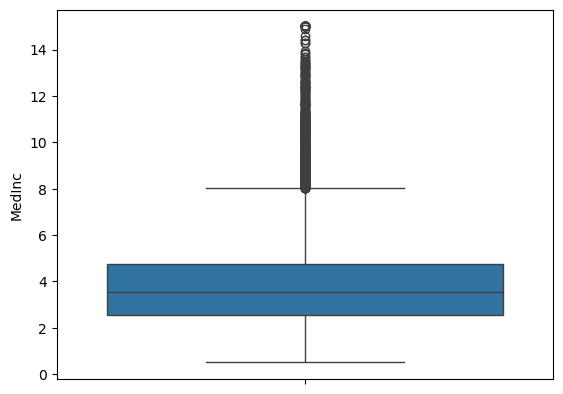

In [13]:
sns.boxplot(data = df['MedInc'])

In the above charts we can see that there are outliers in MedInc, AveRooms, AveBedrms, Population, AveOccup, MedHouseVal.

### Find the Outliers

In [14]:
outlier_column = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [15]:
def remove_outliers_iqr(data, column):
    q1, q2, q3 = np.percentile(data[column], [25, 50, 75])
    print("q1, q2, q3 : ", q1, q2, q3)
    IQR = q3 - q1
    print("IQR : ", IQR)
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column]) # Capping the upper limit
    data[column] = np.where(data[column] < lower_limit, lower_limit, data[column]) # Flooring the lower limit

In [16]:
for column in outlier_column:
    remove_outliers_iqr(df, column)

q1, q2, q3 :  2.5633999999999997 3.5347999999999997 4.74325
IQR :  2.17985
q1, q2, q3 :  4.440716235896959 5.229128787878788 6.052380952380952
IQR :  1.6116647164839932
q1, q2, q3 :  1.006079046038478 1.048780487804878 1.099526066350711
IQR :  0.09344702031223284
q1, q2, q3 :  787.0 1166.0 1725.0
IQR :  938.0
q1, q2, q3 :  2.4297411475535755 2.818115654360196 3.2822609242736216
IQR :  0.8525197767200461


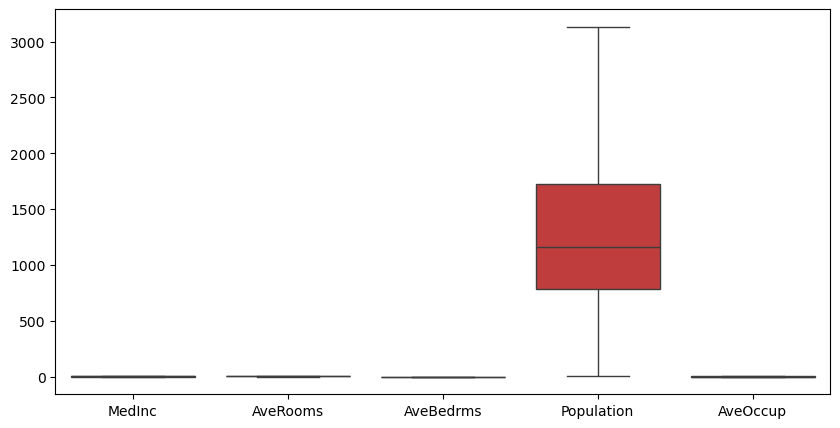

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df[outlier_column])
plt.show()

All the outliers are removed

### Scalling

In [18]:
x = df.drop(columns = ['MedHouseVal'])
y = df['MedHouseVal']

In [19]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.556800,18.0,6.114035,1.239697,356.0,3.122807,39.49,-121.21
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.867200,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [20]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [21]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
x

array([[ 2.54100555,  0.98214266,  1.34766453, ..., -0.49787057,
         1.05254828, -1.32783522],
       [ 2.54100555, -0.60701891,  0.74902704, ..., -1.14278053,
         1.04318455, -1.32284391],
       [ 2.08515552,  1.85618152,  2.39409751, ..., -0.14091034,
         1.03850269, -1.33282653],
       ...,
       [-1.26748763, -0.92485123, -0.07960306, ..., -0.83054596,
         1.77823747, -0.8237132 ],
       [-1.16661997, -0.84539315,  0.01987977, ..., -1.12343912,
         1.77823747, -0.87362627],
       [-0.85207213, -1.00430931, -0.040142  , ..., -0.40899298,
         1.75014627, -0.83369581]], shape=(20640, 8))

In [23]:
x = pd.DataFrame(x)

In [24]:
x.head()

,0,1,2,3,4,5,6,7
0,2.541006,0.982143,1.347665,-0.424488,-1.325821,-0.497871,1.052548,-1.327835
1,2.541006,-0.607019,0.749027,-1.070004,1.389936,-1.142781,1.043185,-1.322844
2,2.085156,1.856182,2.394098,0.192534,-1.098528,-0.140910,1.038503,-1.332827
3,1.111288,1.856182,0.411358,0.187723,-1.017539,-0.508882,1.038503,-1.337818
4,0.027262,1.856182,0.784108,0.287439,-1.008395,-1.039145,1.038503,-1.337818


# 2. Regression Algorithm Implementation & 3. Model Evaluation and Comparison

##### Train Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.33)

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Prediction
y_pred = lr_model.predict(x_test)
y_pred

array([0.23601155, 1.98064134, 3.46309209, ..., 1.03779637, 1.46192577,
       2.35168873], shape=(6812,))

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
mae

0.5008825047438374

In [32]:
mse

0.45289324497485606

In [33]:
r2

0.6601410575981015

## Decision Tree Regressor
A Decision Tree Regressor is a supervised machine learning algorithm that predicts a continuous target variable by building a flowchart-like structure. It splits the dataset into smaller, more homogeneous subsets (regions) based on feature rules, making it highly effective for modeling non-linear, complex data. 

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor()
# Train the model
dtr.fit(x_train,y_train)
# Make predictions
y_pred = dtr.predict(x_test)

In [35]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
mae

0.4826400411039342

In [37]:
mse

0.5578980537477393

In [38]:
r2

0.581343628727978

## Random Forest Regressor
A Random Forest Regressor is an ensemble learning method that improves upon simple decision trees by building a "forest" of them. 

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor()
# Train the model
rfr.fit(x_train, y_train)
# Make predictions
y_pred = rfr.predict(x_test)

In [40]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
mae

0.33719329509688795

In [42]:
mse

0.26161747529922613

In [43]:
r2

0.8036777111259716

Real estate prices do not change linearly with features. Random Forests excel at mapping these complex, non-linear relationships.
A single decision tree often overfits (memorizes training data). A random forest reduces this variance by averaging many, often uncorrelated, trees.

## Gradient Boosting Regressor
Gradient Boosting Regressor (GBR) is an ensemble machine learning technique that constructs a strong predictive model by sequentially combining multiple weak, simple models—typically decision trees. It is an iterative process where each new tree is trained to predict the errors (residuals) of the combined ensemble of all previous trees, gradually improving accuracy. 

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gbr_model.fit(x_train, y_train)
y_pred = gbr_model.predict(x_test)

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
mae

0.3456438318927377

In [47]:
mse

0.2543964848961271

In [48]:
r2

0.8090964675077934

The dataset includes features with heavy tails (e.g., median income), which tree-based ensemble methods handle better than linear models. GBR works well with numerical data that may have different scales, which is characteristic of the California housing dataset.

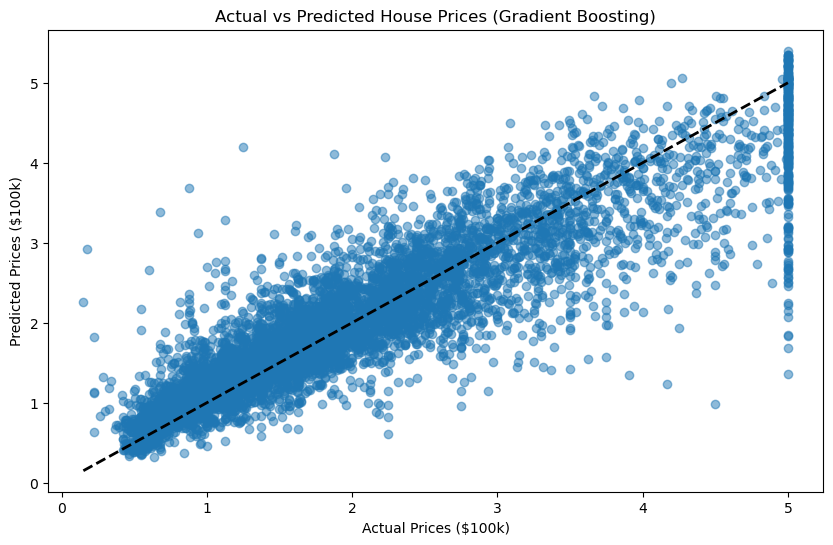

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2) # Diagonal line
plt.xlabel('Actual Prices ($100k)')
plt.ylabel('Predicted Prices ($100k)')
plt.title('Actual vs Predicted House Prices (Gradient Boosting)')
plt.show()

## Support Vector Regressor (SVR)

In [50]:
from sklearn.svm import SVR

In [51]:
svm_reg = SVR(kernel="linear")

svm_reg.fit(x_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [52]:
y_pred = svm_reg.predict(x_test)

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
mae

0.49330618006620824

In [55]:
mse

0.46822809636246276

In [56]:
r2

0.648633519271334

##### Conclusion:
In housing data of california, we first visulaized data then we look for missing value or null values and then we splited our data into training data and testing data then we moved to visualize our training data and to verify proper distribution and then we trained model and calculated MAE, MSE, r2_score.

For the California housing dataset in Python, Random Forest Regressor and Gradient Boosting algorithms are generally the best-performing models, offering high accuracy (r2_score > 0.8) by capturing complex, non-linear relationships better than linear models.